In [1]:
import os
import cv2
import tqdm
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import seamcarving as sc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


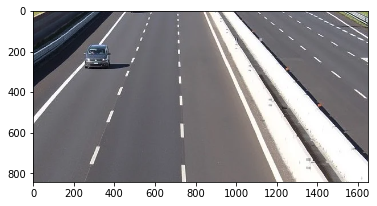

In [2]:
# load image
image_name = "road.png"
image_path = os.path.join("images", image_name)
image = sc.load_image(image_path)
sc.show_image_plt(image)

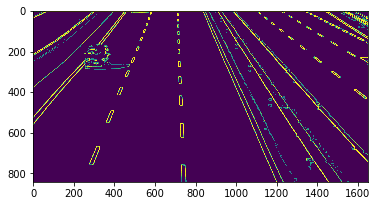

In [3]:
# sobel detection
sc.show_image_plt(sc.sobel_detection(image))

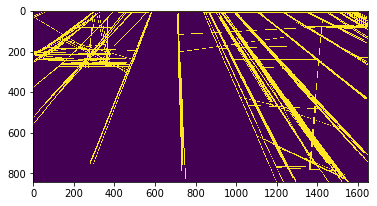

In [4]:
# hough detection
sc.show_image_plt(sc.hough_detection(image))

100%|██████████| 500/500 [01:05<00:00,  7.59it/s]


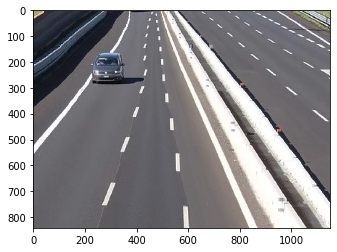

In [5]:
# remove seams normally
current_image = np.copy(image)
for i in tqdm.tqdm(range(500)):
    current_energy = sc.laplacian_energy(current_image)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
sc.show_image_plt(current_image)

100%|██████████| 500/500 [01:21<00:00,  6.12it/s]


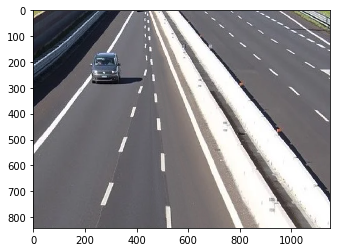

In [6]:
# remove seams with edge protection
current_image = np.copy(image)
current_edges = sc.hough_detection(image)
current_delta = np.zeros((image.shape[0], image.shape[1]))
for i in tqdm.tqdm(range(500)):
        current_energy = sc.normalized(sc.laplacian_energy(current_image)) + current_delta
        current_seam = sc.seam_with_minimum_energy(current_energy)
        mask = sc.seam_to_mask(current_energy.shape, current_seam)
        mask = mask * (current_edges != 0)
        cirs = sc.circles(mask)
        current_delta = current_delta + cirs
        current_delta = (current_delta != 0) * 0.5
        current_image = sc.remove_seam(current_image, current_seam)
        current_edges = sc.remove_seam(current_edges, current_seam)
        current_delta = sc.remove_seam(current_delta, current_seam)
sc.show_image_plt(current_image)